In [1]:
import pandas as pd
import folium
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA


In [2]:
# Carica tutti i dataset spinacio
#df_fastfood = pd.read_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/fastfood.csv')
#df_pollution = pd.read_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/pollution.csv')
#df_geo = pd.read_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/US_GeoCode.csv')
#df_heart = pd.read_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/heart_2018.csv')

# carica tutti i dataset franci vece
df_fastfood = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/fastfood.csv')
df_pollution = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/pollution.csv')
df_geo = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/US_GeoCode.csv')
df_heart = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/heart_2018.csv')

# Seleziona solo le colonne che ci interessano in ogni dataset
df_subset_fastfood = df_fastfood[["num", "State", "latitude", "longitude", "name"]]
df_subset_pollution = df_pollution[["Year", "State", "O3 Mean", "CO Mean", "SO2 Mean", "NO2 Mean"]]
df_subset_GEO = df_geo[["latitude", "longitude", "State"]]
df_subset_heart = df_heart[["YEAR", "State", "RATE", "DEATHS"]]

# Dizionario per mappare le sigle delle province ai loro nomi completi
province_mapping = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}

# Sostituisci le sigle delle province con i loro nomi completi
df_subset_fastfood["State"] = df_subset_fastfood["State"].map(province_mapping)
df_subset_heart["State"] = df_subset_heart["State"].map(province_mapping)

C:\Users\f.vece\AppData\Local\Temp\ipykernel_18120\2596832628.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_fastfood["State"] = df_subset_fastfood["State"].map(province_mapping)
C:\Users\f.vece\AppData\Local\Temp\ipykernel_18120\2596832628.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_heart["State"] = df_subset_heart["State"].map(province_mapping)


**prendiamo dai dataset solamente quelli del 2018**

In [3]:
df_pollution_2018 = df_subset_pollution[df_subset_pollution['Year'] == 2018]
df_pollution_2018 = df_pollution_2018.groupby('State').mean()

df_heart_2018 = df_subset_heart[df_subset_heart['YEAR'] == 2018]

MERGE DEI DATASET PER RENDERLI SFRUTTABILI USANDO LA MAPPA

In [4]:
fastfood_df = pd.merge(df_subset_fastfood, df_subset_GEO, left_on="State", right_on="State", how="inner")
# Ordina il DataFrame per la colonna 'State' in ordine alfabetico
fastfood_df = fastfood_df.sort_values(by='State')

heart_df = pd.merge(df_heart_2018, df_subset_GEO, left_on="State", right_on="State", how="inner")

pollution_df = pd.merge(df_pollution_2018, df_subset_GEO, left_on="State", right_on="State", how="inner")

#pollution_df.to_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/progetto/pollution_completo.csv', index=False)
#fastfood_df.to_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/progetto/fastfood_completo.csv', index=False)
#heart_df.to_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/progetto/heart_completo.csv', index=False)

ORA STAMPO IL NUMERO DI FASTFOOD PRESENTI PER OGNI STATO "fastfood_completo.csv" E PROVO A FARE UNA CORRELAZIONE UTILIZZANDO POI IL DATASET DELLE MORTI PER HEART ATTACK

In [5]:
ff_df = pd.read_csv('fastfood_completo.csv')
# Conta il numero di fast food per stato
fastfood_per_state = ff_df['State'].value_counts()

CI SERVE SOLAMENTE O3 (OZONO TROPOSFERICO) AL FINE DEL NOSTRO STUDIO

LASCIO DI SEGUITO IL LINK:

https://www.escardio.org/The-ESC/Press-Office/Press-releases/ozone-pollution-is-linked-with-increased-hospitalisations-for-cvd#:~:text=Compared%20to%20two%2Dday%20average,6.52%25%20for%20acute%20myocardial%20infarction.

COSTRUISCO LA MAPPA DEL RAPPORTO DELLE MORTI PER INFARTO PER TROVARE UNA CORRELAZIONE

SPOILER: NON C'è UNA CORRELAZIONE EVIDENTE

In [6]:
# Carica il dataset
heart_data = pd.read_csv('heart_completo.csv')

# Raggruppa i dati per stato e calcola la media del tasso di mortalità
state_rate_mean = heart_data.groupby('State')['RATE'].mean().reset_index()

# Crea la mappa centrata sugli Stati Uniti
m = folium.Map(location=[37.0902, -95.7129], zoom_start=3, zoom_control=False, scrollWheelZoom=False)

usa_geojson_path = '/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/usa_geo.json'
state_boundaries = folium.GeoJson(
    usa_geojson_path,
    name='State Boundaries',
    style_function=lambda feature: {
        'color': 'black',      # Imposta il colore del bordo degli stati a nero
        'weight': 1,           # Spessore del bordo
        'fillColor': 'pink',   # Imposta il colore di riempimento degli stati a rosa
        'fillOpacity': 0.5     # Opacità del riempimento
    }
).add_to(m)

# Crea una mappa coroplètica basata sulla media del tasso di mortalità per stato
choropleth = folium.Choropleth(
    #geo_data='C:/Users/f.vece/Documents/Git/progetto-SNA/usa_geo.json',  # File GeoJSON degli stati degli USA franci vece
    geo_data='/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/usa_geo.json',  # File GeoJSON degli stati degli USA spinacio
    name='choropleth',
    data=state_rate_mean,
    columns=['State', 'RATE'],
    key_on='feature.properties.name',  # Chiave per unire i dati GeoJSON e i dati del DataFrame
    fill_color='YlOrRd',  # Schema di colori (da giallo a rosso)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Heart attack',
    nan_fill_color='gray',  # Colore per gli stati senza dati
    nan_fill_opacity=0.4,  # Opacità per gli stati senza dati
    bins=5,  # Numero di bin per la mappa coroplètica
    reset=True,  # Resettare la mappa quando si cambiano le impostazioni
    overlay=True,  # Sovrapporre la mappa coroplètica
    control=True,  # Abilita il controllo della mappa coroplètica
    show=True  # Mostra la mappa coroplètica
).add_to(m)

# Aggiungi legenda interattiva
choropleth.add_to(m)

# Aggiungi il controllo della legenda alla mappa
folium.LayerControl().add_to(m)

# Visualizza la mappa
m


FileNotFoundError: [Errno 2] No such file or directory: '/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/usa_geo.json'

In [ ]:
# Carica il dataset
pollution_data = pd.read_csv('pollution.csv')

# Utilizzando il metodo .loc[]
records_2018 = pollution_data.loc[pollution_data['Year'] == 2018]

# Raggruppa i dati per stato e calcola la media del tasso di mortalità
state_rate_mean = records_2018.groupby('State')['O3 Mean'].sum().reset_index()

# Esportare il DataFrame in un file CSV
state_rate_mean.to_csv('pollution_sum_2018.csv', index=False)

print(state_rate_mean)

# Crea la mappa centrata sugli Stati Uniti
m = folium.Map(location=[37.0902, -95.7129], zoom_start=3, zoom_control=False, scrollWheelZoom=False)

usa_geojson_path = 'C:/Users/f.vece/Documents/Git/progetto-SNA/usa_geo.json'
#usa_geojson_path = '/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/usa_geo.json'
state_boundaries = folium.GeoJson(
    usa_geojson_path,
    name='State Boundaries',
    style_function=lambda feature: {
        'color': 'black',      # Imposta il colore del bordo degli stati a nero
        'weight': 1,           # Spessore del bordo
        'fillColor': 'pink',   # Imposta il colore di riempimento degli stati a rosa
        'fillOpacity': 0.5     # Opacità del riempimento
    }
).add_to(m)

# Crea una mappa coroplètica basata sulla media del tasso di mortalità per stato
choropleth = folium.Choropleth(
    geo_data='C:/Users/f.vece/Documents/Git/progetto-SNA/usa_geo.json',  # File GeoJSON degli stati degli USA franci vece
    #geo_data='/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/usa_geo.json',  # File GeoJSON degli stati degli USA spinacio
    name='choropleth',
    data=state_rate_mean,
    columns=['State', 'O3 Mean'],
    key_on='feature.properties.name',  # Chiave per unire i dati GeoJSON e i dati del DataFrame
    fill_color= 'Blues',  # Cambia lo schema di colori da bianco a blu
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='O3 pollution',
    nan_fill_color='gray',  # Colore per gli stati senza dati
    nan_fill_opacity=0.4,  # Opacità per gli stati senza dati
    bins=5,  # Numero di bin per la mappa coroplètica
    reset=True,  # Resettare la mappa quando si cambiano le impostazioni
    overlay=True,  # Sovrapporre la mappa coroplètica
    control=True,  # Abilita il controllo della mappa coroplètica
    show=True  # Mostra la mappa coroplètica
).add_to(m)

# Aggiungi legenda interattiva
choropleth.add_to(m)

# Aggiungi il controllo della legenda alla mappa
folium.LayerControl().add_to(m)

# Visualizza la mappa
m


                   State     O3 Mean
0                Alabama    5.631006
1                 Alaska    4.636971
2                Arizona   34.041546
3               Arkansas    9.484313
4             California  230.163447
5               Colorado   29.559092
6            Connecticut    9.715861
7               Delaware    8.867561
8   District Of Columbia   10.975441
9                Florida   10.111654
10               Georgia    8.041691
11                Hawaii   33.535636
12                 Idaho    6.940454
13              Illinois    9.255039
14               Indiana    8.439471
15                  Iowa   40.194155
16                Kansas    7.260702
17              Kentucky    9.688561
18             Louisiana    8.423827
19                 Maine   15.462296
20              Maryland   29.405523
21         Massachusetts    9.257186
22              Michigan    5.449160
23             Minnesota    5.368004
24           Mississippi    6.752556
25              Missouri   19.832255
2

ORA PROCEDEREMO CON LO STUDIO DELLE CENTRALITà DEI NODI IN QUALCHE MODO

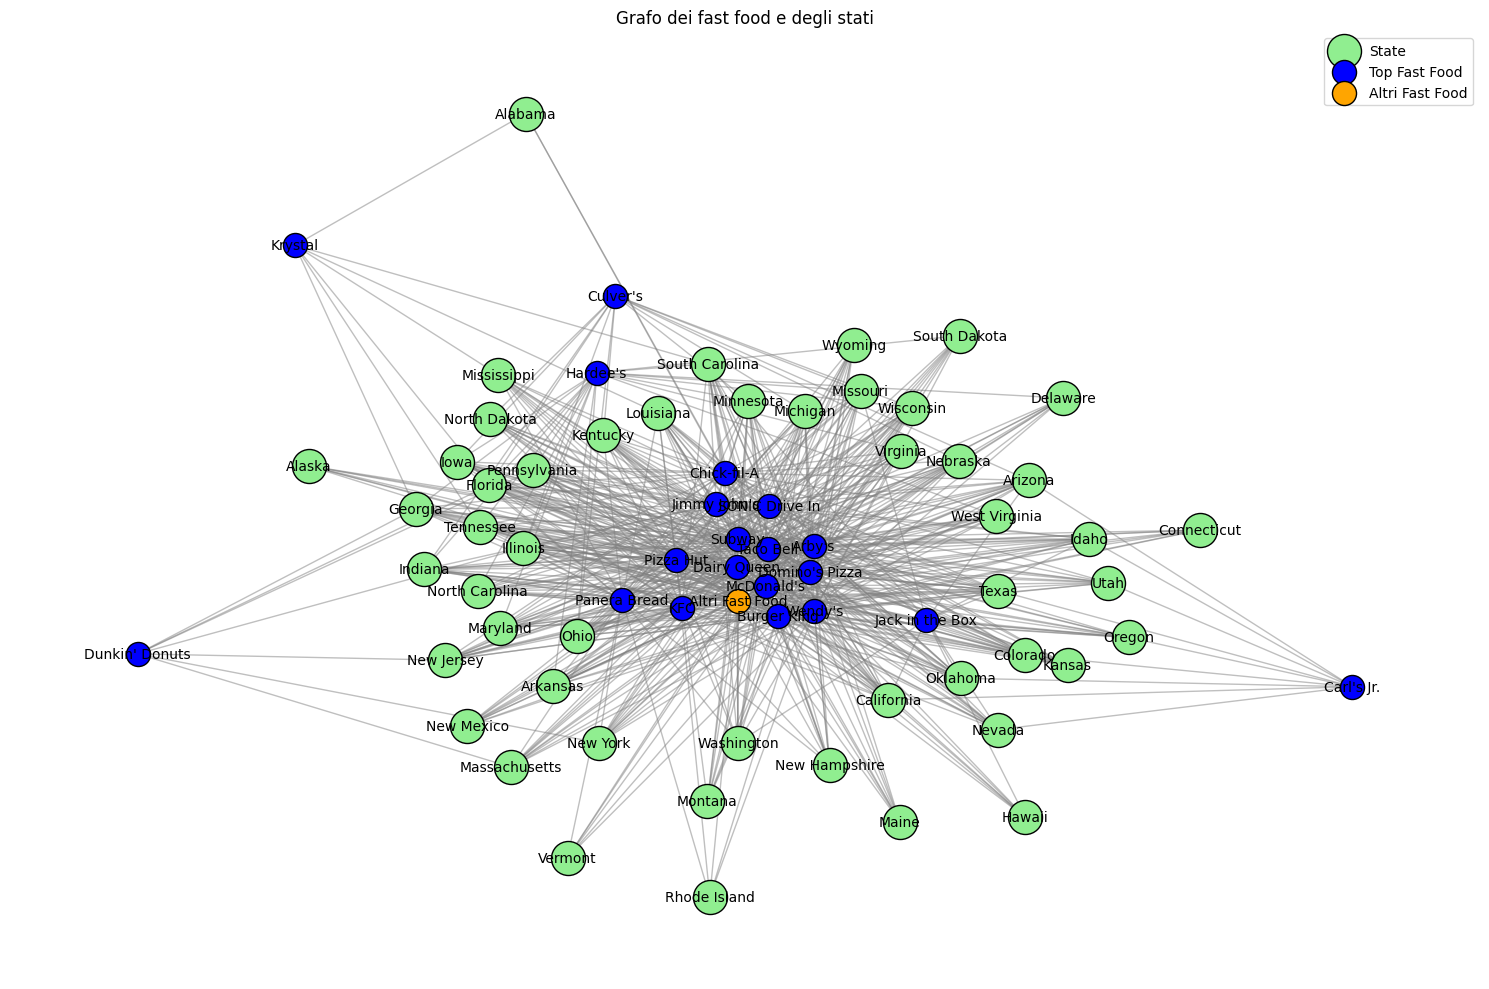

In [ ]:
# Leggiamo il file CSV e otteniamo i 20 fast food più frequenti
#fastfood_df = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/fastfood_completo.csv') #FRANCI VECE
fastfood_df = pd.read_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/fastfood_completo.csv') #SPINACIO
top_fastfood = fastfood_df['name'].value_counts().head(20).index.tolist()
altri_fastfood = fastfood_df[~fastfood_df['name'].isin(top_fastfood)]

# Creiamo un grafo
G = nx.Graph()

# Apriamo il file e aggiungiamo nodi e collegamenti al grafo
#with open('C:/Users/f.vece/Documents/Git/progetto-SNA/fastfood_completo.csv', 'r') as file: FRANCI VECE
with open('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/fastfood_completo.csv', 'r') as file: #SPINACIO
    next(file)  # Salta l'intestazione
    for line in file:
        _, State, _, _, name, _, _ = line.strip().split(',')
        if name in top_fastfood:
            G.add_node(name, type='top_fastfood')
            G.add_node(State, type='state')
            G.add_edge(name, State)

# Aggiungiamo un nodo per rappresentare gli "altri fast food" e lo colleghiamo agli stati
G.add_node('Altri Fast Food', type='altri_fastfood')
for state in altri_fastfood['State'].unique():
    G.add_node(state, type='state')
    G.add_edge('Altri Fast Food', state)

# Disegnamo il grafo
plt.figure(figsize=(15, 10))  # Impostiamo le dimensioni della figura
pos = nx.spring_layout(G, seed=42)  # Posizioni dei nodi
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if G.nodes[node]['type'] == 'state'], node_color='lightgreen', node_size=600, label='State', edgecolors='black')
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if G.nodes[node]['type'] == 'top_fastfood'], node_color='blue', node_size=300, label='Top Fast Food', edgecolors='black')
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if G.nodes[node]['type'] == 'altri_fastfood'], node_color='orange', node_size=300, label='Altri Fast Food', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.title('Grafo dei fast food e degli stati')
plt.legend()
plt.axis('off')  # Rimuoviamo gli assi
plt.tight_layout()  # Ottimizziamo il layout
plt.show()



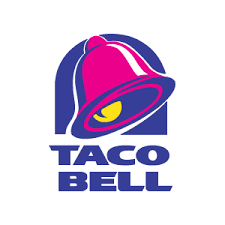
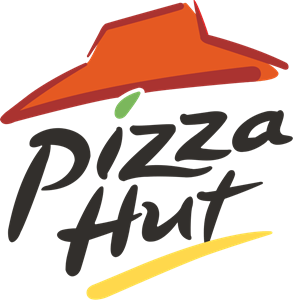
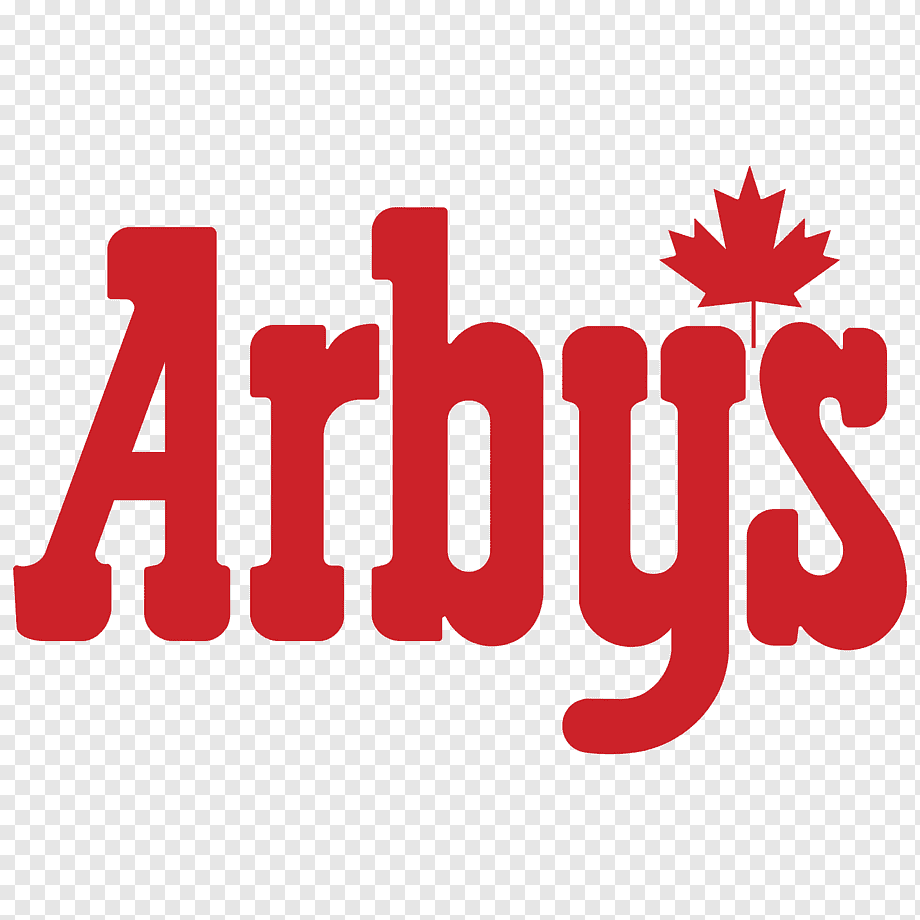
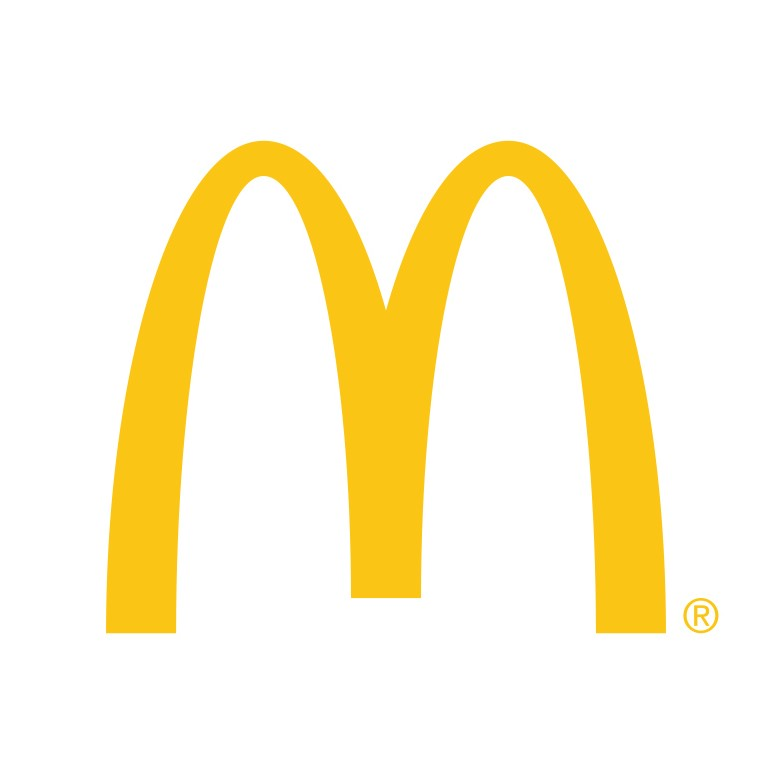
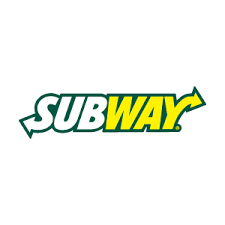
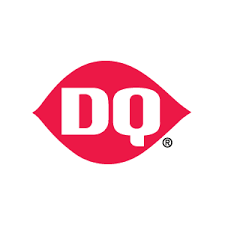
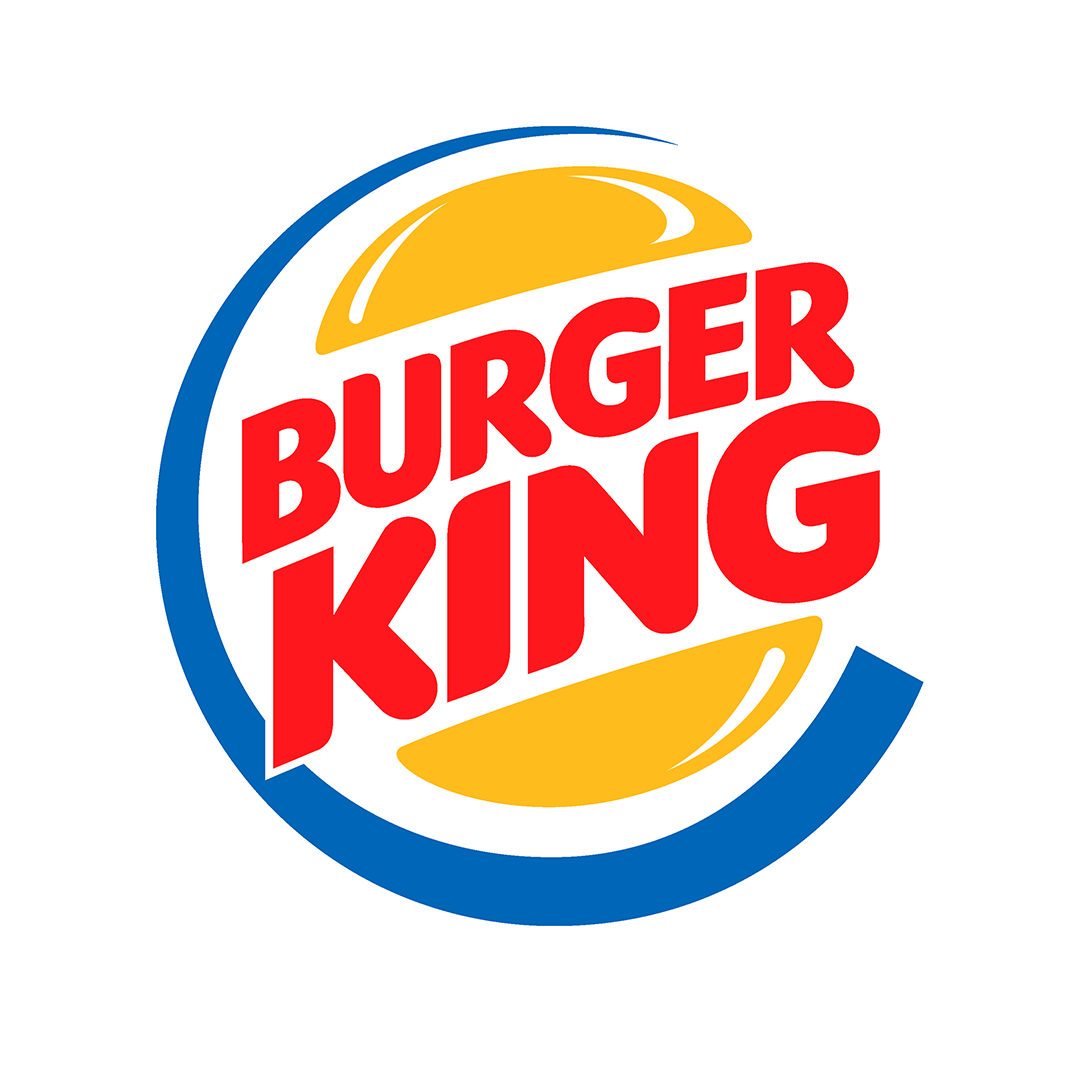
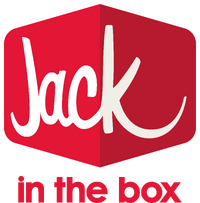
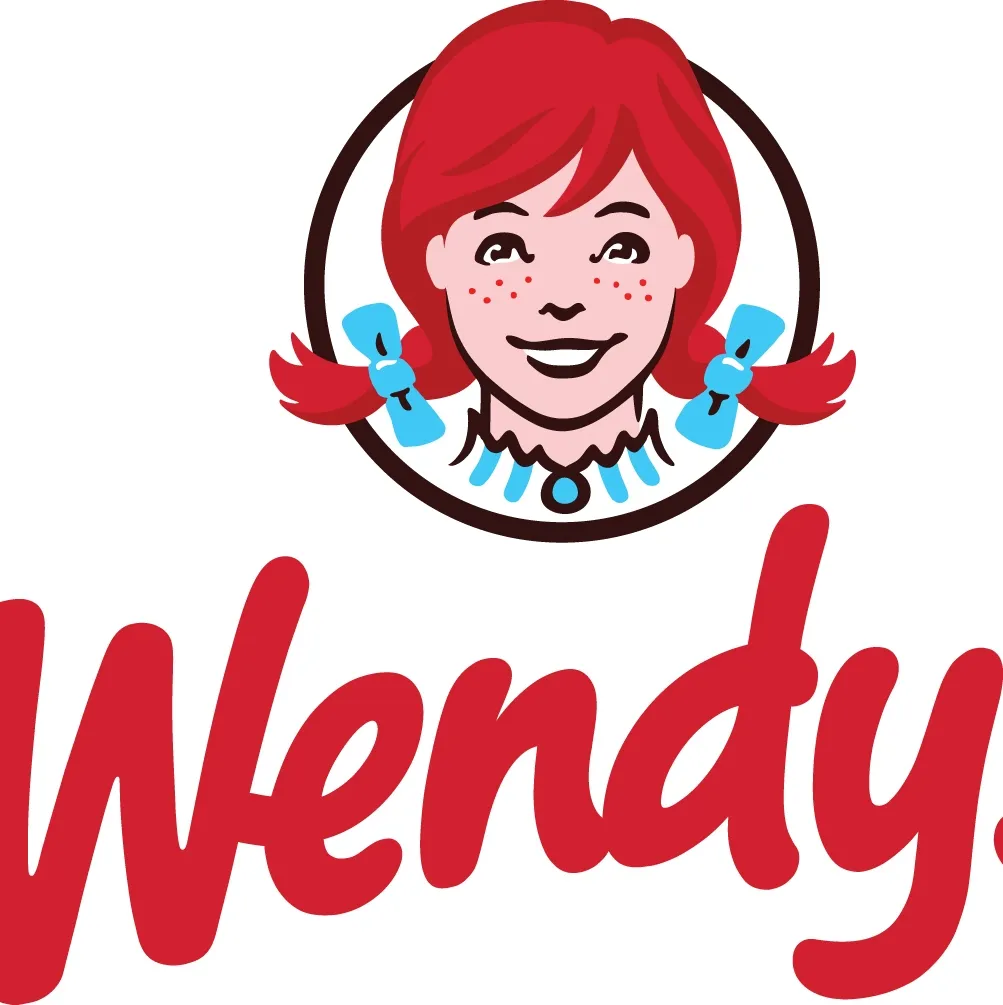
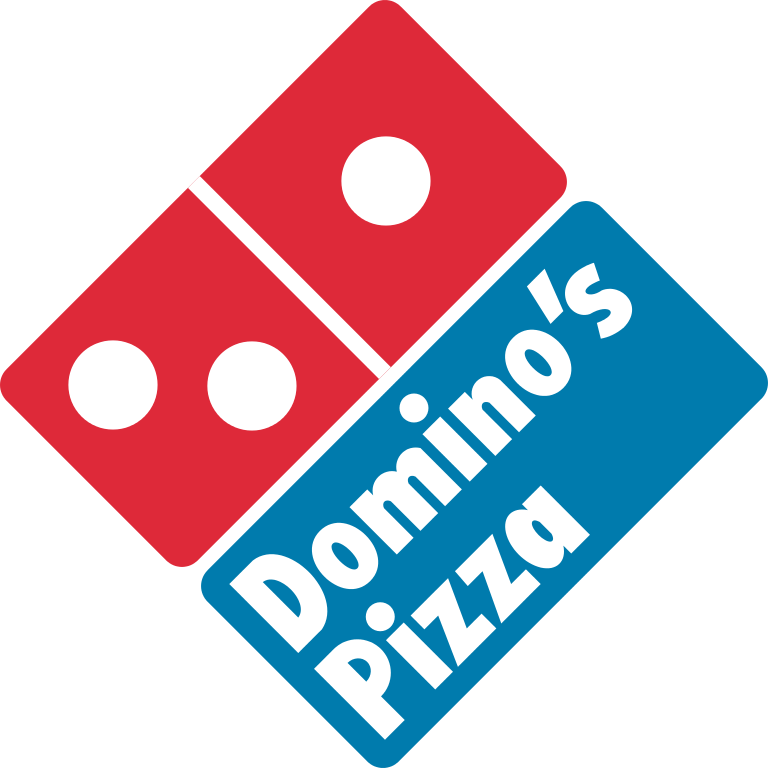

In [ ]:
# Leggiamo il file CSV e otteniamo i 10 fast food più frequenti
#fastfood_df = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/fastfood_completo.csv') #FRANCI VECE
fastfood_df = pd.read_csv('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/fastfood_completo.csv') #SPINACIO
top_fastfood = fastfood_df['name'].value_counts().head(10).index.tolist()
altri_fastfood = fastfood_df[~fastfood_df['name'].isin(top_fastfood)]

# Creiamo un grafo
G = nx.Graph()

# Apriamo il file e aggiungiamo nodi e collegamenti al grafo
#with open('C:/Users/f.vece/Documents/Git/progetto-SNA/fastfood_completo.csv', 'r') as file: #FRANCI VECE
with open('/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/fastfood_completo.csv', 'r') as file: #SPINACIO
    next(file)  # Salta l'intestazione
    for line in file:
        _, State, _, _, name, _, _ = line.strip().split(',')
        if name in top_fastfood:
            G.add_node(name, type='top_fastfood')
            G.add_node(State, type='state')
            G.add_edge(name, State)

# Crea la mappa centrata sugli Stati Uniti
m = folium.Map(location=[37.0902, -95.7129], zoom_start=3, zoom_control=True, scrollWheelZoom=False)

# Carica il file GeoJSON dei confini degli stati degli USA
usa_geojson_path = '/Users/riccardospini/Desktop/unibo/SECONDO_ANNO/SNA/repo progetto/progetto-SNA/usa_geo.json'
state_boundaries = folium.GeoJson(
    usa_geojson_path,
    name='State Boundaries',
    style_function=lambda feature: {
        'color': 'black',      # Imposta il colore del bordo degli stati a nero
        'weight': 1,           # Spessore del bordo
        'fillColor': 'pink',   # Imposta il colore di riempimento degli stati a rosa
        'fillOpacity': 0.5     # Opacità del riempimento
    }
).add_to(m)

# Aggiungi il layer dei confini degli stati alla mappa
state_boundaries.add_to(m)

randomCoordinates=[]

# Funzione per generare coordinate casuali intorno alla mappa americana

def random_coordinates_around_usa(num_points):
    # Centro degli Stati Uniti
    lat_center = 37.0902
    lon_center = -95.7129
    
    # Semilati dell'ellisse che circonda gli Stati Uniti (approssimativi)
    lat_semi_major_axis = 24
    lon_semi_major_axis = 57
    
    # Calcola l'angolo tra ogni punto
    angle_step = 2 * math.pi / num_points
    
    # Lista per memorizzare le coordinate
    random_coordinates = []
    
    # Genera coordinate equidistanti lungo l'ovale
    for i in range(num_points):
        angle = i * angle_step
        lat = lat_center + lat_semi_major_axis * math.cos(angle)
        lon = lon_center + lon_semi_major_axis * math.sin(angle)
        random_coordinates.append((lat, lon))
    
    return random_coordinates

# Esempio di utilizzo
num_points = 11  # Numero di punti desiderato
coordinates = random_coordinates_around_usa(num_points)


# Aggiungi il nodo 'altri fastfood' alla mappa come marker con coordinate casuali intorno alla mappa americana
altri_fastfood_node = coordinates[0]
folium.Marker(
    location=altri_fastfood_node,
    popup='Altri Fast Food',
    icon=folium.Icon(color='green')
).add_to(m)

# Aggiungi i nodi fast food alla mappa come marker con coordinate casuali intorno alla mappa americana
i=1
for node in G.nodes():
    iconPath="Logos/" + node + ".png"
    if G.nodes[node]['type'] == 'top_fastfood':
        folium.Marker(
            location=coordinates[i],
            popup=node,
            icon=folium.CustomIcon(icon_image=iconPath, icon_size=(40,40))
        ).add_to(m)
        i+=1

for state in G.nodes():
    if G.nodes[state]['type'] == 'state':
        state_loc = (
            fastfood_df.loc[fastfood_df['State'] == state, 'latitude_y'].iloc[0],
            fastfood_df.loc[fastfood_df['State'] == state, 'longitude_y'].iloc[0]
        )
        folium.CircleMarker(
            location=state_loc,
            radius=0.01,
            color='black',
            fill=True,
            fill_color='black',
            fill_opacity=0.7
        ).add_to(m)

for state in G.nodes():
    i=1
    if G.nodes[state]['type'] == 'state':
        state_loc = (fastfood_df.loc[fastfood_df['State'] == state, 'latitude_y'].iloc[0], fastfood_df.loc[fastfood_df['State'] == state, 'longitude_y'].iloc[0])
        for fastfood_name in top_fastfood:
            fast_food_loc = (coordinates[i][0], coordinates[i][1])
            folium.PolyLine([fast_food_loc, state_loc], color="grey", weight=0.6, opacity=0.7).add_to(m)
            i+=1

# Collega gli stati al nodo 'altri_fastfood_node' con archi grigi
for state in G.nodes():
    if G.nodes[state]['type'] == 'state':
        state_loc = (fastfood_df.loc[fastfood_df['State'] == state, 'latitude_y'].iloc[0], fastfood_df.loc[fastfood_df['State'] == state, 'longitude_y'].iloc[0])
        folium.PolyLine([altri_fastfood_node, state_loc], color="grey", weight=0.6, opacity=0.7).add_to(m)

# Visualizza la mappa
m

GRAFICI (ISTOGRAMMA) CORRELAZIONE TOP STATI (ASSE X) BLU O3 E ROSSO HEART ATTACK

In [ ]:
# Carica i dataset
heart_attack_completo = pd.read_csv('heart_completo.csv')
pollution_completo = pd.read_csv('pollution_sum_2018.csv')

# Unisci i dataset utilizzando lo stato come chiave primaria
merged_data = pd.merge(heart_attack_completo, pollution_completo, on='State')

# Seleziona solo le colonne necessarie
merged_data = merged_data[['State', 'RATE', 'O3 Mean']]

# Ordina gli stati inversamente
merged_data.sort_values(by='State', ascending=False,  inplace=True)

# Crea l'istogramma con doppie barre in orizzontale
plt.figure(figsize=(12, 15))  # Imposta la dimensione della figura
bar_height = 0.35
index = range(len(merged_data['State']))
plt.barh(index, merged_data['RATE'], bar_height, label='Heart Attack Rate', color='red', alpha=0.7, edgecolor='black')
plt.barh([i + bar_height for i in index], merged_data['O3 Mean'], bar_height, label='O3 Mean', color='blue', alpha=0.7, edgecolor='black')
plt.ylabel('State', fontweight='bold', fontsize=13)  # Cambia l'etichetta dell'asse y in grassetto
plt.title('Heart Attack Rate and O3 Mean by State', fontweight='bold', fontsize=18)

# Imposta gli intervalli dei ticks per lo spaziamento
plt.yticks([i + bar_height / 2 for i in index], merged_data['State'], fontsize=10)  

# Aggiungi i valori sopra le barre con maggiore spazio tra i valori e le barre e con un font più piccolo
for i, rate, o3_mean in zip(index, merged_data['RATE'], merged_data['O3 Mean']):
    plt.text(rate + 6, i, str(round(rate, 2)), ha='center', va='center', color='black', fontsize=8)
    plt.text(o3_mean + 6, i + bar_height, str(round(o3_mean, 2)), ha='center', va='center', color='black', fontsize=8)  # Aggiungi uno spazio

plt.legend(loc='upper left', bbox_to_anchor=(0.85, 0.95), bbox_transform=plt.gcf().transFigure)

# Imposta lo stile degli assi e rimuovi il bordo
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.tight_layout()
plt.show()


             State   RATE  FastNumber
0          Alabama  224.7           6
1           Alaska  129.7          16
2          Arizona  136.4         330
3         Arkansas  217.4         102
4       California  139.7        1201
5         Colorado  124.3         148
6      Connecticut  142.1          53
7         Delaware  159.1          44
8          Florida  143.1         621
9          Georgia  175.8         420
10          Hawaii  125.6          32
11           Idaho  157.9          51
12        Illinois  163.9         405
13         Indiana  180.7         254
14            Iowa  165.1         115
15          Kansas  158.9          74
16        Kentucky  198.3         166
17       Louisiana  212.2         202
18           Maine  147.0          25
19        Maryland  161.9         172
20   Massachusetts  131.5         205
21        Michigan  195.0         374
22       Minnesota  119.0         199
23     Mississippi  222.1          55
24        Missouri  188.4         163
25         M

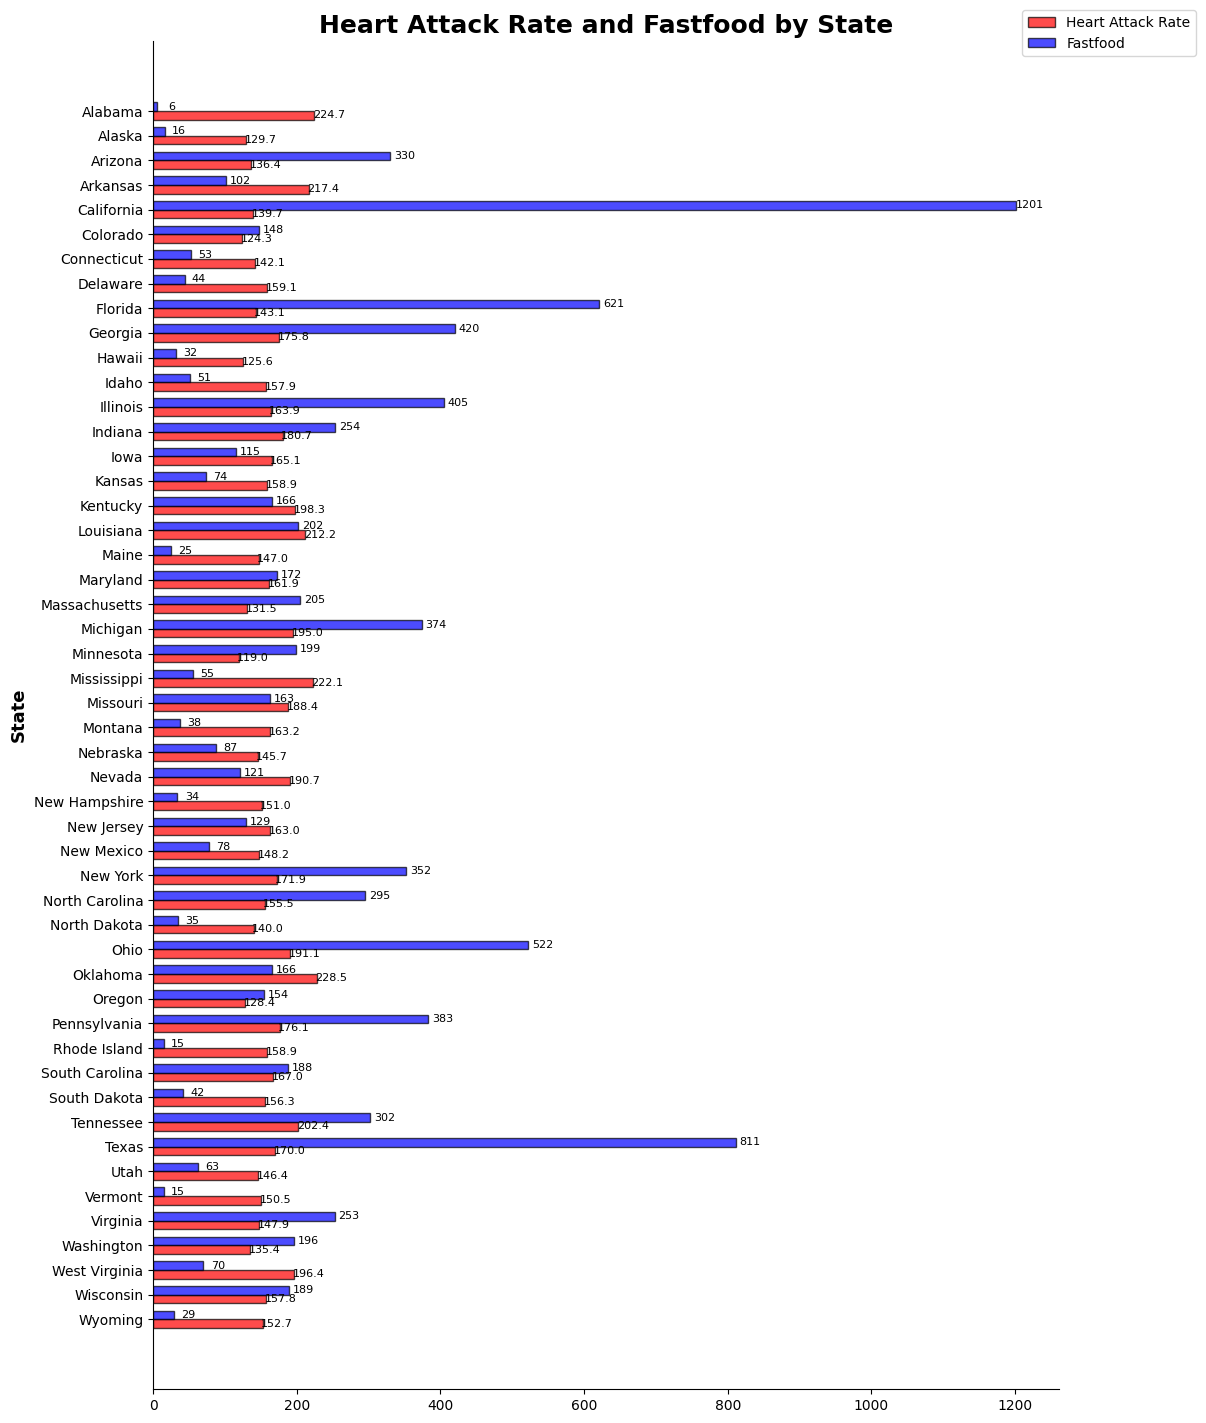

In [16]:
# Carica i dataset
heart_attack_completo = pd.read_csv('heart_completo.csv')
fastfood_completo = pd.read_csv('fastfood_completo.csv')

# Raggruppa per stato e conta le occorrenze
fastfood_completo = fastfood_completo.groupby('State').size().reset_index(name='FastNumber')


# Unisci i dataset utilizzando lo stato come chiave primaria
merged_data = pd.merge(heart_attack_completo, fastfood_completo, on='State')

# Seleziona solo le colonne necessarie
merged_data = merged_data[['State', 'RATE', 'FastNumber']]

print(merged_data)

# Ordina gli stati inversamente
merged_data.sort_values(by='State', ascending=False,  inplace=True)

# Crea l'istogramma con doppie barre in orizzontale
plt.figure(figsize=(12, 15))  # Imposta la dimensione della figura
bar_height = 0.35
index = range(len(merged_data['State']))
plt.barh(index, merged_data['RATE'], bar_height, label='Heart Attack Rate', color='red', alpha=0.7, edgecolor='black')
plt.barh([i + bar_height for i in index], merged_data['FastNumber'], bar_height, label='Fastfood', color='blue', alpha=0.7, edgecolor='black')
plt.ylabel('State', fontweight='bold', fontsize=13)  # Cambia l'etichetta dell'asse y in grassetto
plt.title('Heart Attack Rate and Fastfood by State', fontweight='bold', fontsize=18)

# Imposta gli intervalli dei ticks per lo spaziamento
plt.yticks([i + bar_height / 2 for i in index], merged_data['State'], fontsize=10)  

# Aggiungi i valori sopra le barre con maggiore spazio tra i valori e le barre e con un font più piccolo
for i, rate, fastfood in zip(index, merged_data['RATE'], merged_data['FastNumber']):
    plt.text(rate + 25, i, str(round(rate, 2)), ha='center', va='center', color='black', fontsize=8)
    plt.text(fastfood + 25, i + bar_height, str(round(fastfood, 2)), ha='center', va='center', color='black', fontsize=8)  # Aggiungi uno spazio

plt.legend(loc='upper left', bbox_to_anchor=(0.85, 0.95), bbox_transform=plt.gcf().transFigure)

# Imposta lo stile degli assi e rimuovi il bordo
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.tight_layout()
plt.show()


visualizzare informazioni correlazioni tra infarti e fastfood (fare forma tabellare)

RATE significa il rapporto dei morti ogni 100.000 persone

In [ ]:
# Carica entrambi i dataset
fastfood_df = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/fastfood_completo.csv')
heart_df = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/heart_completo.csv')

# Effettua il groupby per lo stato e conta i fast food per stato
fastfood_df = fastfood_df.groupby('State').size().reset_index(name='count')

# Unisci i due dataset sulla colonna "State"
heart_fastfood = pd.merge(fastfood_df, heart_df, on="State", how="inner")

# Rimuovi le colonne specificate dal DataFrame
heart_fastfood.drop(columns=['YEAR', 'DEATHS', 'latitude', 'longitude'], inplace=True)

#CORRELAZIONE DI PEARSON TRA FASTFOOD E HEART ATTACK
correlation_coefficient= np.corrcoef(heart_fastfood['count'], heart_fastfood['RATE'])[0,1]

print(correlation_coefficient)


-0.00464974111393791


In [ ]:
# Carica entrambi i dataset
pollution_df = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/pollution_completo.csv')
heart_df = pd.read_csv('C:/Users/f.vece/Documents/Git/progetto-SNA/heart_completo.csv')

# Unisci i due dataset sulla colonna "State"
heart_pollution = pd.merge(pollution_df, heart_df, on="State", how="inner")

# Arrotonda il risultato a due cifre decimali
heart_pollution['O3 Mean'] = heart_pollution['O3 Mean'].round(5)

# Rimuovi le colonne specificate dal DataFrame
heart_pollution.drop(columns=['Year', 'DEATHS', 'latitude_y', 'longitude_y', 'CO Mean', 'SO2 Mean', 'NO2 Mean', 'YEAR', 'latitude_x', 'longitude_x'], inplace=True)

#CORRELAZIONE DI PEARSON TRA INQUINAMENTO E HEART ATTACK
correlation_coefficient= np.corrcoef(heart_pollution['O3 Mean'], heart_pollution['RATE'])[0,1]

print(correlation_coefficient)


0.0994089288645418


In [ ]:
heart_fastfood_pollution = pd.merge(heart_pollution, heart_fastfood, on="State", how="inner")
heart_fastfood_pollution.drop(columns=['RATE_y'], inplace=True)

# Seleziona le colonne da normalizzare
data_to_normalize = heart_fastfood_pollution[['O3 Mean', 'RATE_x', 'count']]

# Crea un oggetto StandardScaler
scaler = StandardScaler()

# Adatta il modello e trasforma i dati
normalized_data = scaler.fit_transform(data_to_normalize)

# Crea un nuovo dataframe con i dati normalizzati
normalized_df = pd.DataFrame(normalized_data, columns=['O3 Mean', 'RATE_x', 'count'])

# Aggiungi la colonna 'State' al dataframe normalizzato
heart_fastfood_pollution['State'] = heart_fastfood_pollution['State']

# Seleziona solo le colonne numeriche per il calcolo della correlazione
numeric_columns = heart_fastfood_pollution.select_dtypes(include=['float64', 'int64'])

# Calcola la correlazione di Pearson
correlation_matrix = numeric_columns.corr(method='pearson')

print("Matrice di correlazione di Pearson:")
print(correlation_matrix)

Matrice di correlazione di Pearson:
          O3 Mean    RATE_x     count
O3 Mean  1.000000  0.099409 -0.027325
RATE_x   0.099409  1.000000  0.001575
count   -0.027325  0.001575  1.000000
